# Plot estimate from the algorithm $\hat{\theta}$ vs true $\theta^*$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, time
from functions_queueing_system import *
from functions_extremum_seeking import *
import random

In [2]:
seed_val=2
np.random.seed(seed_val)
random.seed(seed_val)

In [3]:
M = 100
K = 50
T = 200000

dep_rate = [0.3, 0.6]
eps = 1
gamma = 0.1
alpha = 1
beta = 0.9
avg_over = 100
A = 0.01
B = 10 #was 10 before

# Test performance on multiple runs

In [4]:
num_true_vals = 20
num_init_vals = 5
# theta_init_all = np.linspace(1e-3, 1-1e-3, num=num_init_vals)
theta_init_all = np.random.rand(num_init_vals)
results_all = [[None]*num_init_vals for _ in range(num_true_vals)] #made a change to save results properly, need to run it at some point (do it in the evening today)
theta_hat_t_all = np.zeros((T, num_init_vals, num_true_vals))
theta_hat_mean_all = np.zeros((num_true_vals,))
theta_star_all = np.linspace(1e-3, 1-1e-3, num=num_true_vals)

In [6]:
random.seed(0)
np.random.seed(0)

#first half
# start = 0
# end = int(num_true_vals/2)

#second half's first quarter
start = int(num_true_vals/2)
end = int(3*num_true_vals/4)

#second half's second quarter
# start = int(3*num_true_vals/4)
# end = num_true_vals

tic = time.perf_counter()
for j in range(start, end):
    theta_star_j = theta_star_all[j]
    for i in range(num_init_vals):
        results_all[j][i] = estimate_theta_es(theta_init_all[i], theta_star=theta_star_j, M=M, K=K, T=T,\
                                              alpha=alpha, beta=beta, gamma=gamma, eps=eps, dep_rate=dep_rate, A=A, B=B)
        theta_hat_t_all[:,i,j] = results_all[j][i]['theta_hat_t']
        print(f"theta_star={theta_star_j} run={i+1} done")
        with open('status_secondhalf.txt', 'w+') as f:
            f.write(f"theta_star={theta_star_j} ({j+1-start}/{end-start}) run={i+1}/{num_init_vals} done in {time.perf_counter()-tic}s")
    if (j+1)%5==0 or j==num_true_vals-1:
        np.savez('./results/algo_performance_qs_first-'+str(j+1)+'.npz', M=M, K=K, T=T, \
             dep_rate=dep_rate, eps=eps, gamma=gamma, alpha=alpha, beta=beta, avg_over=avg_over,\
            num_init_vals= num_init_vals, num_true_vals=num_true_vals, theta_init_all=theta_init_all, \
            results_all=results_all, theta_hat_t_all=theta_hat_t_all, theta_hat_mean_all=theta_hat_mean_all,\
            theta_star_all=theta_star_all)
    print(f"theta_star={theta_star_j} done")
    theta_hat_mean_all[j] = np.mean(np.mean(theta_hat_t_all[-avg_over:,:,j], axis=0)) #average over the last 200 steps
toc = time.perf_counter()
print(f"time={toc-tic}s")

theta_star=0.5262631578947369 run=1 done
theta_star=0.5262631578947369 run=2 done
theta_star=0.5262631578947369 run=3 done
theta_star=0.5262631578947369 run=4 done
theta_star=0.5262631578947369 run=5 done
theta_star=0.5262631578947369 done
theta_star=0.5787894736842105 run=1 done
theta_star=0.5787894736842105 run=2 done
theta_star=0.5787894736842105 run=3 done
theta_star=0.5787894736842105 run=4 done
theta_star=0.5787894736842105 run=5 done
theta_star=0.5787894736842105 done
theta_star=0.6313157894736842 run=1 done
theta_star=0.6313157894736842 run=2 done
theta_star=0.6313157894736842 run=3 done
theta_star=0.6313157894736842 run=4 done
theta_star=0.6313157894736842 run=5 done
theta_star=0.6313157894736842 done
theta_star=0.6838421052631579 run=1 done
theta_star=0.6838421052631579 run=2 done
theta_star=0.6838421052631579 run=3 done
theta_star=0.6838421052631579 run=4 done
theta_star=0.6838421052631579 run=5 done
theta_star=0.6838421052631579 done
theta_star=0.7363684210526316 run=1 done

MemoryError: 

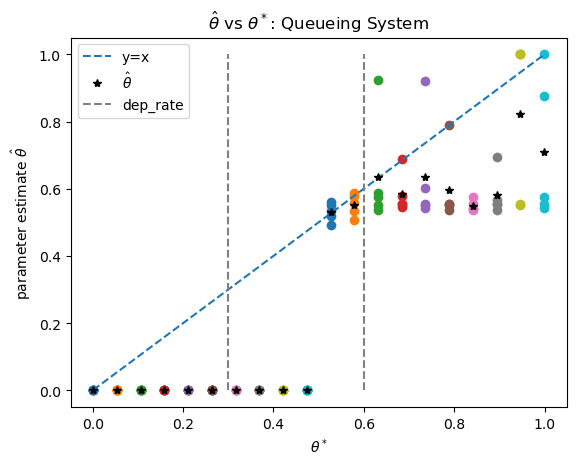

In [8]:
for j in range(num_true_vals):
    plt.scatter([theta_star_all[j]]*num_init_vals, np.mean(theta_hat_t_all[-avg_over:,:,j], axis=0))
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, theta_hat_mean_all, 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"$\theta^*$")
plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Queueing System")
plt.legend()

In [ ]:
plt.plot(theta_star_all, theta_hat_mean_all, '*', label=r"$\hat{\theta}$")
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='k')
plt.xlabel(r"$\theta^*$")
plt.ylabel(r"parameter estimate from the algorithm $\hat{\theta}$")
plt.legend()

In [ ]:
k = 10
for i in range(num_init_vals):
    plt.plot(theta_hat_t_all[:,i,k])
plt.hlines(theta_star_all[k], 0, T, linestyles='dashed', colors='k')

In [ ]:
k = 10
plt.plot(results_all[k][i]['X'])
plt.title(r"$\theta^*=$"+str(round(theta_star_all[k], 3)))
plt.ylabel("X")
plt.xlabel("time t")

In [ ]:
# np.savez_compressed('./results/algo_performance_qs_first-'+str(20)+'.npz', M=M, K=K, T=T, \
#              dep_rate=dep_rate, eps=eps, gamma=gamma, alpha=alpha, beta=beta, avg_over=avg_over,\
#             num_init_vals= num_init_vals, num_true_vals=num_true_vals, theta_init_all=theta_init_all, \
#             results_all=results_all, theta_hat_t_all=theta_hat_t_all, theta_hat_mean_all=theta_hat_mean_all,\
#             theta_star_all=theta_star_all)

In [ ]:
# #only the last 5 are saved
# np.savez('./results/algo_performance_qs_last-'+str(5)+'.npz', M=M, K=K, T=T, \
#              dep_rate=dep_rate, eps=eps, gamma=gamma, alpha=alpha, beta=beta, avg_over=avg_over,\
#             num_init_vals= num_init_vals, num_true_vals=5, theta_init_all=theta_init_all, \
#             results_all=[results_all[j] for j in range(15, 20)], theta_hat_t_all=theta_hat_t_all[:,:,-5:], theta_hat_mean_all=theta_hat_mean_all[-5:],\
#             theta_star_all=theta_star_all[-5:])

In [ ]:
# np.savez('./results/algo_ performance_qs.npz', M=M, K=K, T=T, \
#          dep_rate=dep_rate, eps=eps, gamma=gamma, alpha=alpha, beta=beta, avg_over=avg_over,\
#         num_init_vals= num_init_vals, num_true_vals=num_true_vals, theta_init_all=theta_init_all, \
#         results_all=results_all, theta_hat_t_all=theta_hat_t_all, theta_hat_mean_all=theta_hat_mean_all,\
#         theta_star_all=theta_star_all)